In [ ]:
import pandas as pd 
df=pd.read_csv("CNNBSWhileeee.csv");
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df.head(5)
tc=100;
tc=tc+1

print(df.head())

In [344]:
trainX,train_Y=df['code'],df['tag']

In [345]:
tmp=[]
for i in trainX:
    k=i.split()
    if(len(k)==100):
        k.append(0)
    
        
    a=np.array(k)
    a=a.astype('float32')
    
    
    a=a.reshape(tc,1)
    tmp.append(a)
train_X=np.array(tmp)
train_X.shape
type(train_X[1][1][0])



numpy.float32

In [346]:


train_X.shape

(260, 101, 1)

In [347]:
train_X=train_X/155 
train_X

array([[[ 0.        ],
        [ 0.        ],
        [ 0.        ],
        ..., 
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       [[ 0.        ],
        [ 0.        ],
        [ 0.        ],
        ..., 
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       [[ 0.        ],
        [ 0.        ],
        [ 0.        ],
        ..., 
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       ..., 
       [[ 0.76774192],
        [ 0.67096776],
        [ 0.67741936],
        ..., 
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       [[ 0.76774192],
        [ 0.67096776],
        [ 0.67741936],
        ..., 
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       [[ 0.76774192],
        [ 0.67096776],
        [ 0.67741936],
        ..., 
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]]], dtype=float32)

In [348]:
train_X = train_X.reshape(-1, tc,1, 1)
train_X.shape

(260, 101, 1, 1)

In [349]:
from keras.utils import to_categorical

In [350]:
train_Y_one_hot = to_categorical(train_Y)
#test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[2])
print('After conversion to one-hot:', train_Y_one_hot[2])


Original label: 0
After conversion to one-hot: [ 1.  0.]


In [351]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.20, random_state=13)

In [352]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape


((208, 101, 1, 1), (52, 101, 1, 1), (208, 2), (52, 2))

In [353]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [354]:
batch_size = 64
epochs = 25
num_classes = 2

In [355]:
binary_model = Sequential()
binary_model.add(Conv2D(16, kernel_size=(4, 1),activation='linear',input_shape=(tc,1,1),padding='same'))
binary_model.add(LeakyReLU(alpha=0.1))
binary_model.add(MaxPooling2D((2, 1),padding='same'))
binary_model.add(Dropout(0.2))
binary_model.add(Conv2D(32, (2, 1), activation='linear',padding='same'))
binary_model.add(LeakyReLU(alpha=0.1))
binary_model.add(MaxPooling2D(pool_size=(2, 1),padding='same'))
binary_model.add(Dropout(0.2))
binary_model.add(Flatten())
binary_model.add(Dense(128, activation='linear'))
binary_model.add(LeakyReLU(alpha=0.1))                  
binary_model.add(Dense(num_classes, activation='softmax'))

In [356]:
binary_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [357]:
binary_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 101, 1, 16)        80        
_________________________________________________________________
leaky_re_lu_22 (LeakyReLU)   (None, 101, 1, 16)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 51, 1, 16)         0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 51, 1, 16)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 51, 1, 32)         1056      
_________________________________________________________________
leaky_re_lu_23 (LeakyReLU)   (None, 51, 1, 32)         0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 26, 1, 32)         0         
__________

In [358]:
binary_train = binary_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 208 samples, validate on 52 samples
Epoch 1/25
208/208 [==============================] - 1s 5ms/step - loss: 0.6922 - acc: 0.5817 - val_loss: 0.6787 - val_acc: 0.7885
Epoch 2/25
208/208 [==============================] - 0s 316us/step - loss: 0.6721 - acc: 0.6779 - val_loss: 0.6569 - val_acc: 0.7885
Epoch 3/25
208/208 [==============================] - 0s 337us/step - loss: 0.6519 - acc: 0.7115 - val_loss: 0.6296 - val_acc: 0.8269
Epoch 4/25
208/208 [==============================] - 0s 313us/step - loss: 0.6307 - acc: 0.7163 - val_loss: 0.6038 - val_acc: 0.7308
Epoch 5/25
208/208 [==============================] - 0s 313us/step - loss: 0.6272 - acc: 0.6827 - val_loss: 0.5828 - val_acc: 0.8462
Epoch 6/25
208/208 [==============================] - 0s 327us/step - loss: 0.5881 - acc: 0.7356 - val_loss: 0.5811 - val_acc: 0.7885
Epoch 7/25
208/208 [==============================] - 0s 303us/step - loss: 0.5551 - acc: 0.7500 - val_loss: 0.5384 - val_acc: 0.8654
Epoch 8/25
208/208 

In [359]:
test_eval =binary_model.evaluate(train_X, train_label, verbose=0)

In [360]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.272669544587
Test accuracy: 0.899038461538


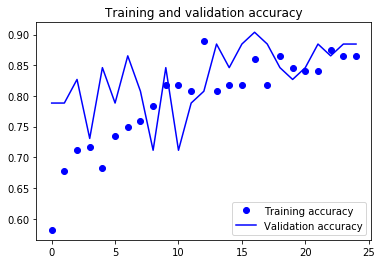

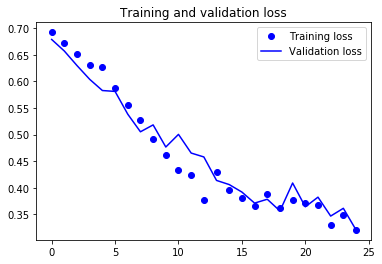

In [361]:
accuracy = binary_train.history['acc']
val_accuracy = binary_train.history['val_acc']
loss = binary_train.history['loss']
val_loss = binary_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [362]:
from sklearn.metrics import classification_report
predicted_classes=binary_model.predict(valid_X)
#print(predicted_classes)

In [363]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


In [364]:
predicted_classes


array([0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [365]:
actual= np.argmax(np.round(valid_label),axis=1)

In [366]:
actual

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [367]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(predicted_classes,actual))

             precision    recall  f1-score   support

          0       0.94      0.89      0.91        35
          1       0.79      0.88      0.83        17

avg / total       0.89      0.88      0.89        52



In [368]:

def cleanData(c):
    code=c
    df1 = pd.DataFrame({'A':[code]})
            
    df1 = df1.replace('\n',' ', regex=True)
    df1 = df1.replace('\t',' ', regex=True)
    df1 = df1.replace('\r',' ', regex=True)
    df1 = df1.replace(',',' ', regex=True)
    c=0
    tmp=""
    for i in df1['A']:
                c=0
                aa=i.split()
                ff=0
                #print(aa)
                for it in aa:
                    if "while" in it:
                        ff=1
                        #print("While found at",it)
                    if ff==1:
                        for xx in it:
                            
                            if c<=100:
                                tmp=tmp+str(ord(xx))+' '
                                #print(ord(xx),end=' ')
                                c=c+1
                    if "lower_bound" in it :
                        for xx in it:
                            
                            if c<=100:
                                tmp=tmp+str(ord(xx))+' '
                                #print(ord(xx),end=' ')
                                c=c+1
                    if "upper_bound" in it :
                        for xx in it:
                            
                            if c<=100:
                                tmp=tmp+str(ord(xx))+' '
                                #print(ord(xx),end=' ')
                                c=c+1
                while(c<=100):
                    tmp=tmp+"0 "
                    #print(0,end=' ')
                    c=c+1
                        
               
            
    #print(ff)          
    return tmp
            
    
    

In [369]:
def makeCNNReady(c):
    tmp=[]
    tmp=c.split()
    aa=np.array(tmp)
    aa=aa.astype('float32')
    
    aa=aa.reshape(tc,1)
    aa=aa.reshape(-1,tc,1,1)
    aa=aa/155
    return aa

In [370]:
def getPrediction(c):
    pred=binary_model.predict(makeCNNReady(cleanData(c)))
    print(pred)
    #cc=np.argmax(np.round(pred),axis=1)
    if pred[0][1]>=pred[0][0]:
        return "yes"
    else:
        return "no"

In [371]:
code="""
#include<bits/stdc++.h>
using namespace std;
int main()
{

while(l<=r)
{
int mid=(l+r)/2;
if(a[mid]==k)
else if(a[mid]<k)
r=mid-1;
else if(a[mid]>k)
l=mid+1;
}
}

}


"""

In [372]:
#cleanData(code)
getPrediction(code)


[[ 0.05819317  0.94180691]]


'yes'

In [373]:
code="""

#include <iostream>
#include <cstdio>
#include <algorithm>
#include <cstring>
using namespace std;
const int maxn = 2e5+8;
int n,a[maxn],dp1[maxn],len1[maxn],dp2[maxn],h1[maxn],h2[maxn],len2[maxn];
int main(){
    scanf("%d",&n);
    for(int i = 1;i <= n;++i)
        scanf("%d",&a[i]),a[i] -= i;
    int mx = 1;
    memset(dp1,0x3f,sizeof(dp1));
    for(int i = 1;i <= n;++i){
        int idx = upper_bound(dp1+1,dp1+1+n,a[i]) - dp1;
        dp1[idx] = a[i];
        mx = max(mx,idx);
        len1[i] = mx;
        h1[i] = dp1[mx];
    }
    memset(dp2,0x3f,sizeof(dp2));
    mx = 1;
    for(int i = n;i >= 1;--i){
        int idx = upper_bound(dp2+1,dp2+1+n,-a[i]-1) - dp2;
        dp2[idx] = -a[i]-1;
        mx = max(mx,idx);
        len2[i] = mx;
        h2[i] = dp2[mx];
    }
    dp1[0] = 0;dp2[0] = -2;
    int ans = max(len1[n],len2[1]);
    for(int i = 1;i <= n;++i){
        //printf("i:%d len1:%d len2:%d dp1:%d dp2:%d\n",i,len1[i-1],len2[i+1],h1[i-1],h2[i+1]);
        if(h1[i-1] <= -h2[i+1]){
            ans = max(ans,len1[i-1]+len2[i+1]);
        }
    }
    cout<<max(0,n-1-ans)<<endl;
    return 0;
}








"""

In [374]:
getPrediction(code)

[[ 0.15316056  0.84683949]]


'yes'

In [375]:
code="""
#include<bits/stdc++.h>
using namespace std;
int main()
{

while(t--)
{
cin>>n;
if(n%2==0)
cout<<"Even"<<endl;
else
cout<<"Odd"<<endl;

}
}

"""



In [376]:
getPrediction(code)

[[ 0.75119144  0.24880858]]


'no'

In [377]:
code="""

#include<bits/stdc++.h>
using namespace std;
int main()
{
int t,n,k,i,x;
cin>>t;
while(t--)
{
cin>>n>>k;
x=0;
for(i=0;i<n;i++)
{
cin>>a[i];
if(a[i]%2==0)
x=1;
}



}

}




"""

In [378]:
#print(cleanData(code))
print(getPrediction(code))


[[ 0.87431043  0.12568964]]
no


In [379]:
tt=makeCNNReady(cleanData(code))


In [380]:
tt.shape

(1, 101, 1, 1)

In [381]:
tt=tt/155

In [382]:
getPrediction(code)

[[ 0.87431043  0.12568964]]


'no'

In [383]:
print(code)



#include<bits/stdc++.h>
using namespace std;
int main()
{
int t,n,k,i,x;
cin>>t;
while(t--)
{
cin>>n>>k;
x=0;
for(i=0;i<n;i++)
{
cin>>a[i];
if(a[i]%2==0)
x=1;
}



}

}







In [384]:
#x=makeCNNReady(cleanData(code))
#print(x)
getPrediction(code)

[[ 0.87431043  0.12568964]]


'no'

In [385]:
code="""

#include<bits/stdc++.h>
using namespace std;
int main()
{
        ios_base::sync_with_stdio(0);
        cin.tie(0);
        cout.tie(0);
        cin>>n>>k;
        for(i=0;i<n;i++)
        cin>>a[i];
        while(i<n)
        {
            if(a[i]==k)
            {
                cout<<i<<endl;
                break;
            }
            i++;
        }
        
        
}






"""


In [386]:
cleanData(code)

'119 104 105 108 101 40 105 60 110 41 123 105 102 40 97 91 105 93 61 61 107 41 123 99 111 117 116 60 60 105 60 60 101 110 100 108 59 98 114 101 97 107 59 125 105 43 43 59 125 125 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 '

In [387]:
getPrediction(code)

[[ 0.80430442  0.19569558]]


'no'

In [388]:
binary_model.save('binary_model.h5')
print("Model saved");

Model saved
